## **Task 2: Time Series Analysis**

For the following task we'll

- Import data from `yfinance`
- Plot time series
- Decompose it into trend, seasonality, residuals
- Apply moving average smoothing

#### 1. Import Libraries

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

#### 2. Download Data

Will be using daily **Amazon(AMZN)** prices for last 5 years.

In [2]:
amzn_df = yf.download('AMZN', start='2020-01-01', end='2025-01-01')
amzn_df.head()

C:\Users\Gunjan Kothari\AppData\Local\Temp\ipykernel_19584\2494206085.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amzn_df = yf.download('AMZN', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000


#### 3. Plot Time Series

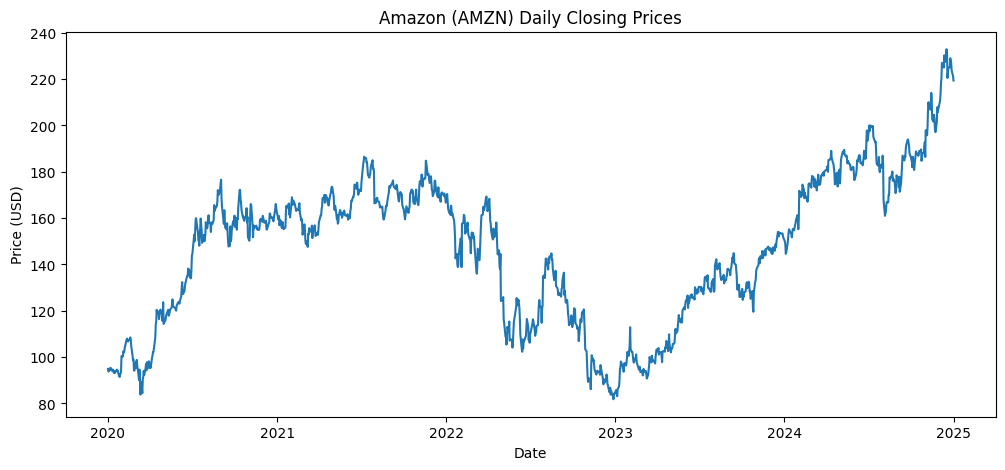

In [3]:
plt.figure(figsize=(12,5))
plt.plot(amzn_df['Close'], label='AMZN Close Price')
plt.title('Amazon (AMZN) Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

#### 4. Decompose the Time Series

To decompose, we need regular frequency and enough data for atleast 2 full cycles of seasonality. For daily data let's try weekly or monthly frequency.

C:\Users\Gunjan Kothari\AppData\Local\Temp\ipykernel_19584\2406847715.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = amzn_df['Close'].resample('M').mean()


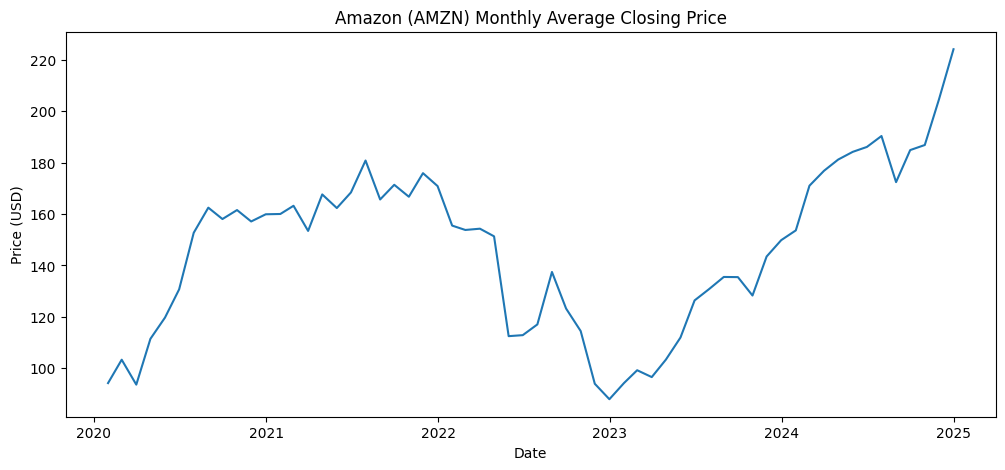

In [4]:
monthly_df = amzn_df['Close'].resample('M').mean()

# Plot resampled data
plt.figure(figsize=(12,5))
plt.plot(monthly_df)
plt.title('Amazon (AMZN) Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

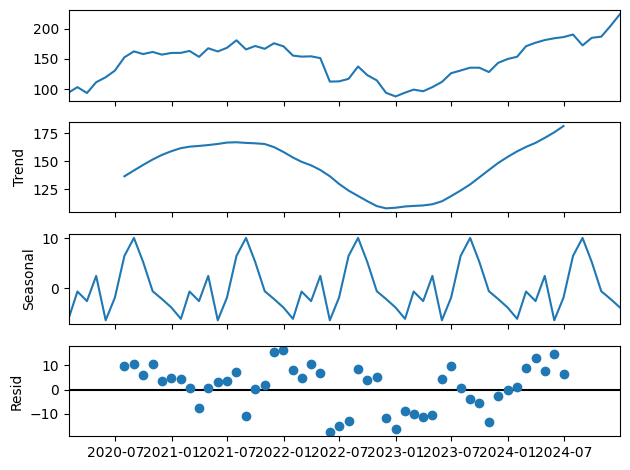

In [5]:
#Decompose 
result = seasonal_decompose(monthly_df, model='additive', period=12)

# Plot decomposition 

result.plot()
plt.show() 

#### 5. Moving Average Smoothing

Smooth the original daily data using a 30-day rolling average

Price           Close       High        Low       Open    Volume Close_MA30
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN           
Date                                                                       
2020-01-02  94.900497  94.900497  93.207497  93.750000  80580000        NaN
2020-01-03  93.748497  94.309998  93.224998  93.224998  75288000        NaN
2020-01-06  95.143997  95.184502  93.000000  93.000000  81236000        NaN
2020-01-07  95.343002  95.694504  94.601997  95.224998  80898000        NaN
2020-01-08  94.598503  95.550003  94.321999  94.902000  70160000        NaN


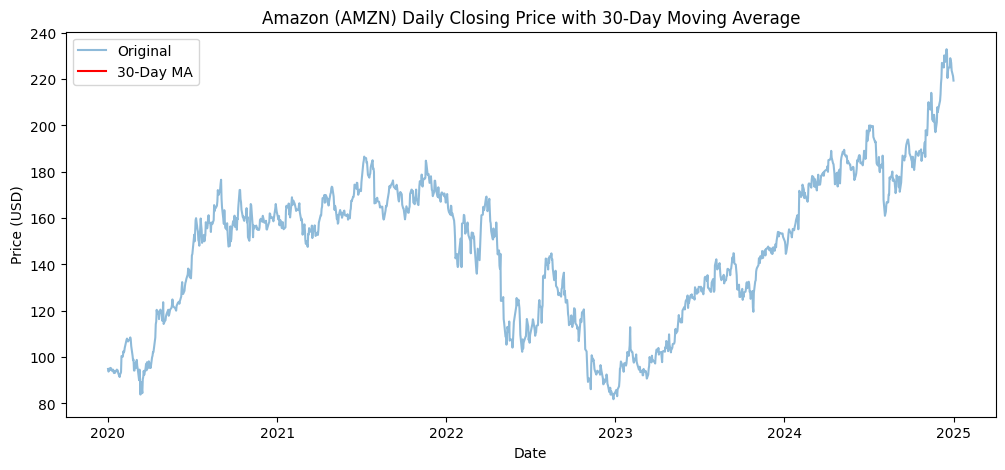

In [10]:
amzn_df['Close_MA30'] = amzn_df['Close'].rolling(window=30).mean()
print(amzn_df.head())
plt.figure(figsize=(12,5))
plt.plot(amzn_df['Close'], label='Original', alpha=0.5)
plt.plot(amzn_df['Close_MA30'], label='30-Day MA', color='red')
plt.title('Amazon (AMZN) Daily Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



**Interpretation of Amazon (AMZN) Time Series Analysis**

1. **Trend:**  
The decomposition reveals a clear upward trend in Amazon's stock price over the last five years, with some periods of stagnation and decline, especially in 2022. The trend component highlights long-term growth, interrupted by market corrections.

2. **Seasonality:**  
There is a noticeable seasonal pattern in the monthly average closing prices, likely reflecting recurring business cycles, such as increased sales during holiday seasons and other periodic events affecting Amazon's performance.

3. **Residuals:**  
The residual component captures irregular fluctuations not explained by trend or seasonality. These could be due to unexpected market events, earnings reports, or macroeconomic factors.

4. **Moving Average Smoothing:**  
The 30-day moving average smooths out short-term volatility, making it easier to observe the underlying trend. This helps in identifying sustained movements in the stock price, filtering out daily noise.

**Conclusion:**  
Amazon's stock price has generally increased over the analyzed period, with both seasonal effects and irregular events influencing its movement. The decomposition and smoothing techniques provide valuable insights for understanding and forecasting future price behavior.
